In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
tweets_csv = "Data Chunks/2021-2022_labeled.csv"  # Path to your tweets CSV file
df = pd.read_csv(tweets_csv)
len(df)

C:\Users\pryty\AppData\Local\Temp\ipykernel_2028\2795033863.py:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(tweets_csv)


18791424

In [29]:
# Ensure your date column is in datetime format
df['datetime'] = pd.to_datetime(df['datetime'])

# Filter for human only
df_human = df[df['spam'] == 'human']
len(df_human)

9179543

In [30]:
# Group by day and emotion, then count
result = df_human.groupby([pd.Grouper(key='datetime', freq='6H'), 'emotion']).size()
result

C:\Users\pryty\AppData\Local\Temp\ipykernel_2028\2794343238.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  result = df_human.groupby([pd.Grouper(key='datetime', freq='6H'), 'emotion']).size()


datetime                   emotion   
2021-01-01 00:00:00+00:00  Anger          289
                           Excitement     608
                           Fear           110
                           Greed           70
                           Neutral        477
                                         ... 
2022-06-30 18:00:00+00:00  Fear           639
                           Greed           92
                           Neutral       1503
                           Optimism      1531
                           Pessimism      763
Length: 15253, dtype: int64

In [31]:
# Transform the series into a DataFrame with emotions as columns
result_df = result.unstack(fill_value=0)
result_df

emotion,Anger,Excitement,Fear,Greed,Neutral,Optimism,Pessimism
datetime,,,,,,,
2021-01-01 00:00:00+00:00,289,608,110,70,477,781,128
2021-01-01 06:00:00+00:00,179,251,62,47,339,543,77
2021-01-01 12:00:00+00:00,439,498,148,59,631,875,238
2021-01-01 18:00:00+00:00,567,456,185,75,865,939,208
2021-01-02 00:00:00+00:00,455,373,136,46,715,657,174
...,...,...,...,...,...,...,...
2022-06-29 18:00:00+00:00,1342,606,474,46,1500,1448,530
2022-06-30 00:00:00+00:00,1066,477,416,43,1112,991,417
2022-06-30 06:00:00+00:00,1103,686,889,84,1212,1268,609


In [32]:
full_idx = pd.date_range(
    start=result_df.index.min(),
    end  =result_df.index.max(),
    freq ='6H',
    tz   =result_df.index.tz
)

# reindex to introduce NaNs where data was missing
df_full = result_df.reindex(full_idx)

# 2. interpolate linearly in time
#    method='time' looks at the actual timestamps when weighting
df_filled = df_full.interpolate(method='time')
df_filled

C:\Users\pryty\AppData\Local\Temp\ipykernel_2028\2089053790.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  full_idx = pd.date_range(


emotion,Anger,Excitement,Fear,Greed,Neutral,Optimism,Pessimism
2021-01-01 00:00:00+00:00,289.0,608.0,110.0,70.0,477.0,781.0,128.0
2021-01-01 06:00:00+00:00,179.0,251.0,62.0,47.0,339.0,543.0,77.0
2021-01-01 12:00:00+00:00,439.0,498.0,148.0,59.0,631.0,875.0,238.0
2021-01-01 18:00:00+00:00,567.0,456.0,185.0,75.0,865.0,939.0,208.0
2021-01-02 00:00:00+00:00,455.0,373.0,136.0,46.0,715.0,657.0,174.0
...,...,...,...,...,...,...,...
2022-06-29 18:00:00+00:00,1342.0,606.0,474.0,46.0,1500.0,1448.0,530.0
2022-06-30 00:00:00+00:00,1066.0,477.0,416.0,43.0,1112.0,991.0,417.0
2022-06-30 06:00:00+00:00,1103.0,686.0,889.0,84.0,1212.0,1268.0,609.0
2022-06-30 12:00:00+00:00,1598.0,879.0,845.0,113.0,1904.0,2061.0,838.0


In [33]:
# Define a custom weighted rolling function
def weighted_rolling_sum(df, window):
    weights = np.array([1 / np.log(2 + i) for i in range(window)])  # Compute weights

    # Apply the weighted rolling function
    def apply_weights(x):
        if len(x) < window:
            # Adjust weights for shorter windows at the start
            w = weights[-len(x):]
            return np.sum(x * w)
        return np.sum(x * weights)

    return df.rolling(window=window, min_periods=1).apply(apply_weights, raw=True)

# Apply the custom weighted rolling function to the DataFrame
window = 16  # Define the rolling window size
result_rolling_df = weighted_rolling_sum(df_filled, window)

# Display the resulting DataFrame
result_rolling_df

emotion,Anger,Excitement,Fear,Greed,Neutral,Optimism,Pessimism
2021-01-01 00:00:00+00:00,102.004320,214.597323,38.825174,24.706929,168.360071,275.658733,45.178384
2021-01-01 06:00:00+00:00,167.413863,307.881633,61.557393,41.836101,291.693510,473.341382,73.343863
2021-01-01 12:00:00+00:00,326.227190,490.817042,115.218911,63.624934,521.125210,793.081841,159.041917
2021-01-01 18:00:00+00:00,534.069920,663.635432,183.252851,91.631744,838.820865,1143.467615,236.191138
2021-01-02 00:00:00+00:00,707.706353,812.167452,235.757620,110.173783,1111.778948,1403.920266,303.401223
...,...,...,...,...,...,...,...
2022-06-29 18:00:00+00:00,7347.252085,4499.558714,3267.913417,397.349699,9404.288518,10062.850813,3379.223285
2022-06-30 00:00:00+00:00,7637.704677,4657.242172,3489.249308,427.326809,9855.509231,10469.063677,3525.251242
2022-06-30 06:00:00+00:00,8172.051598,4858.656235,3734.471172,464.671869,10459.959909,11013.200903,3816.317308
2022-06-30 12:00:00+00:00,8264.329610,4796.868038,3852.968982,470.430244,10435.732101,10980.800440,3884.808200


In [34]:
# Calculate the percentage for each emotion per day
result_percentage_df = result_rolling_df.div(result_rolling_df.sum(axis=1), axis=0)

# Display the resulting DataFrame
result_percentage_df

emotion,Anger,Excitement,Fear,Greed,Neutral,Optimism,Pessimism
2021-01-01 00:00:00+00:00,0.117337,0.246853,0.044661,0.028421,0.193666,0.317093,0.051969
2021-01-01 06:00:00+00:00,0.118141,0.217267,0.043440,0.029523,0.205843,0.334029,0.051757
2021-01-01 12:00:00+00:00,0.132122,0.198781,0.046664,0.025768,0.211056,0.321198,0.064412
2021-01-01 18:00:00+00:00,0.144692,0.179795,0.049648,0.024825,0.227257,0.309793,0.063990
2021-01-02 00:00:00+00:00,0.151061,0.173358,0.050323,0.023517,0.237311,0.299669,0.064761
...,...,...,...,...,...,...,...
2022-06-29 18:00:00+00:00,0.191542,0.117303,0.085194,0.010359,0.245169,0.262337,0.088096
2022-06-30 00:00:00+00:00,0.190650,0.116253,0.087098,0.010667,0.246010,0.261326,0.087996
2022-06-30 06:00:00+00:00,0.192196,0.114269,0.087830,0.010928,0.246005,0.259016,0.089755
2022-06-30 12:00:00+00:00,0.193608,0.112376,0.090263,0.011021,0.244477,0.257246,0.091009


In [35]:
# Define the desired column order
emotion_order = [
    "Greed",
    "Excitement",
    "Optimism",
    "Neutral",
    "Pessimism",
    "Fear",
    "Anger",
]

# Reorder the columns in the specified order
result_percentage_df = result_percentage_df.reindex(columns=emotion_order)

# Display the reordered DataFrame
result_percentage_df

emotion,Greed,Excitement,Optimism,Neutral,Pessimism,Fear,Anger
2021-01-01 00:00:00+00:00,0.028421,0.246853,0.317093,0.193666,0.051969,0.044661,0.117337
2021-01-01 06:00:00+00:00,0.029523,0.217267,0.334029,0.205843,0.051757,0.043440,0.118141
2021-01-01 12:00:00+00:00,0.025768,0.198781,0.321198,0.211056,0.064412,0.046664,0.132122
2021-01-01 18:00:00+00:00,0.024825,0.179795,0.309793,0.227257,0.063990,0.049648,0.144692
2021-01-02 00:00:00+00:00,0.023517,0.173358,0.299669,0.237311,0.064761,0.050323,0.151061
...,...,...,...,...,...,...,...
2022-06-29 18:00:00+00:00,0.010359,0.117303,0.262337,0.245169,0.088096,0.085194,0.191542
2022-06-30 00:00:00+00:00,0.010667,0.116253,0.261326,0.246010,0.087996,0.087098,0.190650
2022-06-30 06:00:00+00:00,0.010928,0.114269,0.259016,0.246005,0.089755,0.087830,0.192196
2022-06-30 12:00:00+00:00,0.011021,0.112376,0.257246,0.244477,0.091009,0.090263,0.193608


In [36]:
result_percentage_df_rounded = result_percentage_df.round(6)
result_percentage_df_rounded.to_csv("Data Chunks/2021-2022_6h_emotion_pct.csv", index=True)

In [37]:
btc_csv = 'bitcoin_prices_3.csv'
# -- Load Bitcoin price data --
btc_df = pd.read_csv(btc_csv, parse_dates=['Start'])
btc_df = btc_df[['Start', 'Close']].dropna()
btc_df['date'] = btc_df['Start'].dt.date
btc_series = btc_df.set_index('date')['Close']

# Align dates for plotting
dates = result_percentage_df.index
btc_aligned = btc_series.reindex(dates)

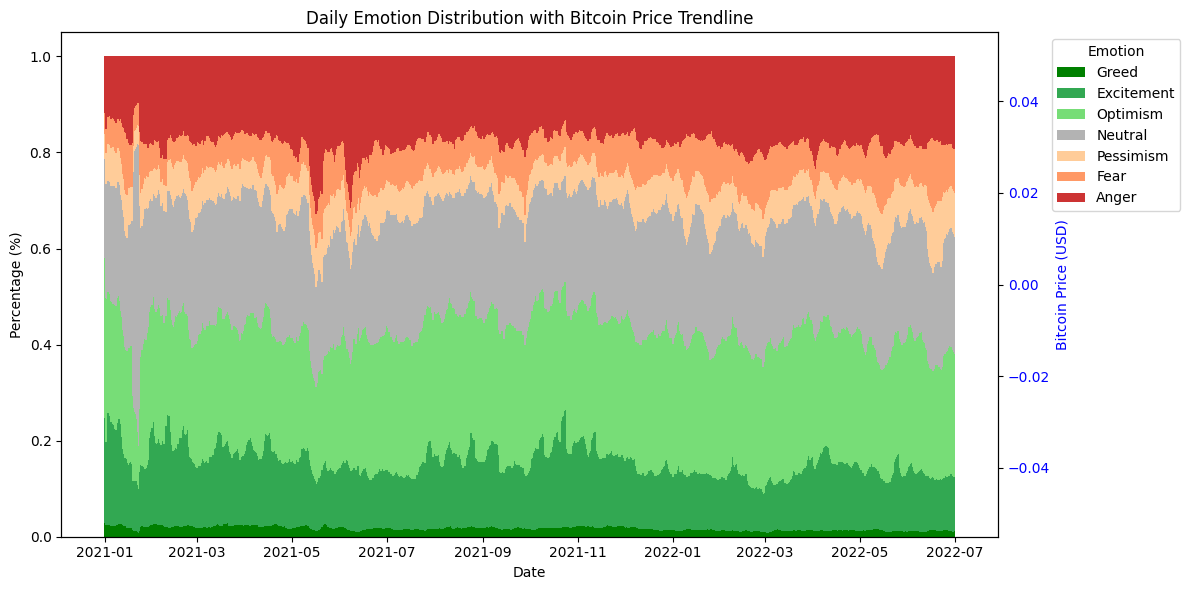

In [38]:
# Define emotion colors
emotion_colors = {
    "Greed": "#008000",      # Strong Green (Best)
    "Optimism": "#77DD77",   # Medium Green
    "Excitement": "#32A852", # Light Green (Least Good)    
    "Neutral": "#B3B3B3",    # Neutral Gray
    "Pessimism": "#FFCC99",  # Light Orange (Least Bad)
    "Fear": "#FF9966",       # Medium Orange
    "Anger": "#CC3333",      # Strong Red (Worst)
}

# Plot the stacked bar chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Initialize the bottom of the stack
bottom = np.zeros(len(result_percentage_df_rounded))

# Loop through each emotion and add it to the stack
for emotion in result_percentage_df_rounded.columns:
    ax1.bar(
        result_percentage_df_rounded.index, 
        result_percentage_df_rounded[emotion], 
        bottom=bottom, 
        color=emotion_colors[emotion], 
        label=emotion, 
        width=1
    )
    bottom += result_percentage_df_rounded[emotion]

# Add Bitcoin price trendline
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(dates, btc_aligned.values, color='blue', label='BTC Price', linestyle='-', linewidth=1)
ax2.set_ylabel("Bitcoin Price (USD)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Formatting
ax1.set_xlabel("Date")
ax1.set_ylabel("Percentage (%)")
ax1.set_title("Daily Emotion Distribution with Bitcoin Price Trendline")
ax1.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Compute the difference between today's and yesterday's values
result_diff_df = result_percentage_df.diff()

# Replace NaN values (e.g., in the first row) with 0
result_diff_df = result_diff_df.fillna(0)

# Display the resulting DataFrame
result_diff_df

emotion,Greed,Excitement,Optimism,Neutral,Pessimism,Fear,Anger
datetime,,,,,,,
2021-01-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-01-02,0.000275,0.056553,-0.057584,0.001036,0.012320,0.007978,-0.020579
2021-01-03,-0.000260,-0.001206,-0.002116,0.003601,0.002601,0.000286,-0.002906
2021-01-04,-0.000795,-0.010739,0.001170,0.003931,0.000002,0.002273,0.004158
2021-01-05,-0.000436,-0.007846,0.004280,0.003384,-0.001461,-0.000725,0.002804
...,...,...,...,...,...,...,...
2022-06-26,0.000408,0.002890,0.008357,0.005118,-0.014678,-0.001220,-0.000875
2022-06-27,-0.000421,0.003725,0.002990,0.002217,-0.003650,-0.002673,-0.002187
2022-06-28,-0.000232,-0.002398,0.001515,0.000032,-0.000472,-0.000871,0.002427


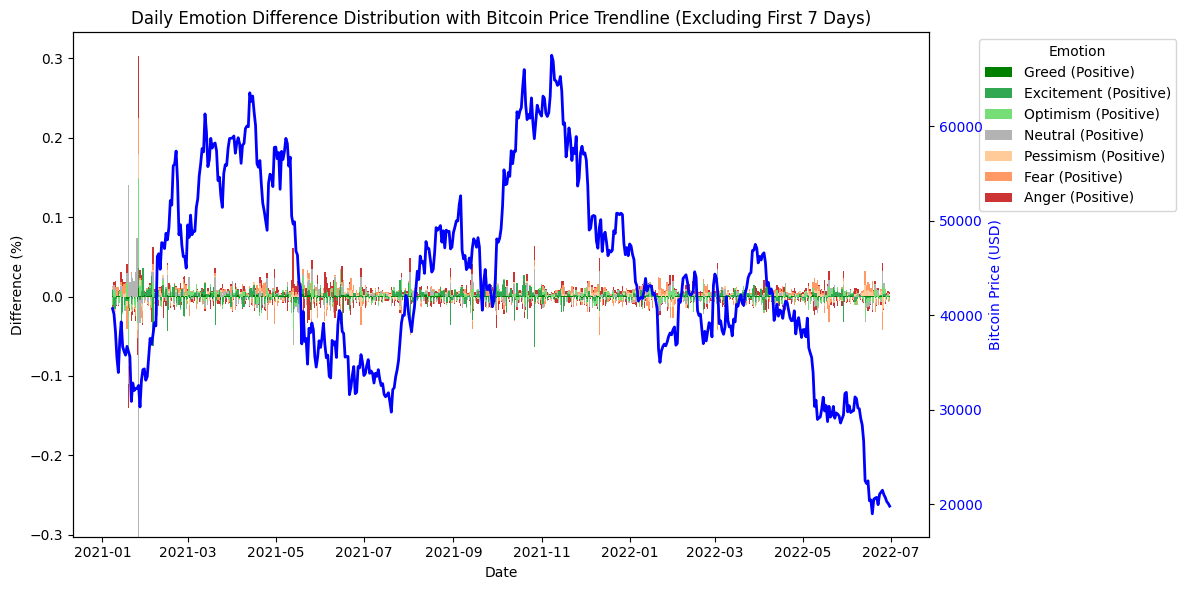

In [18]:
# Exclude the first 7 days
result_diff_df_trimmed = result_diff_df.iloc[7:]
btc_aligned_trimmed = btc_aligned.iloc[7:]
dates_trimmed = dates[7:]

# Plot the stacked bar chart for positive and negative values
fig, ax1 = plt.subplots(figsize=(12, 6))

# Initialize the bottom of the stack for positive and negative values
bottom_positive = np.zeros(len(result_diff_df_trimmed))
bottom_negative = np.zeros(len(result_diff_df_trimmed))

# Loop through each emotion and add it to the stack
for emotion in result_diff_df_trimmed.columns:
    # Positive values
    ax1.bar(
        result_diff_df_trimmed.index,
        result_diff_df_trimmed[emotion].clip(lower=0),  # Clip negative values to 0
        bottom=bottom_positive,
        color=emotion_colors[emotion],
        label=f"{emotion} (Positive)", 
        width=1
    )
    bottom_positive += result_diff_df_trimmed[emotion].clip(lower=0)

    # Negative values
    ax1.bar(
        result_diff_df_trimmed.index,
        result_diff_df_trimmed[emotion].clip(upper=0),  # Clip positive values to 0
        bottom=bottom_negative,
        color=emotion_colors[emotion]
    )
    bottom_negative += result_diff_df_trimmed[emotion].clip(upper=0)

# Add Bitcoin price trendline
ax2 = ax1.twinx()  # Create a secondary y-axis
ax2.plot(dates_trimmed, btc_aligned_trimmed.values, color='blue', label='BTC Price', linestyle='-', linewidth=2)
ax2.set_ylabel("Bitcoin Price (USD)", color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

# Formatting
ax1.set_xlabel("Date")
ax1.set_ylabel("Difference (%)")
ax1.set_title("Daily Emotion Difference Distribution with Bitcoin Price Trendline (Excluding First 7 Days)")
ax1.legend(title="Emotion", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show the plot
plt.show()